['manzana1.jpg', 'manzana4.jpg', 'manzana5.jpg', 'manzana2.jpg', 'banano1.jpg', 'manzana3.jpg']
manzana1.jpg


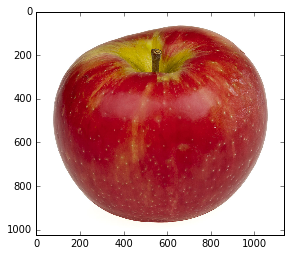

manzana4.jpg


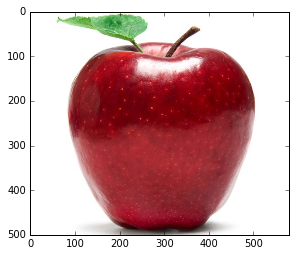

manzana5.jpg


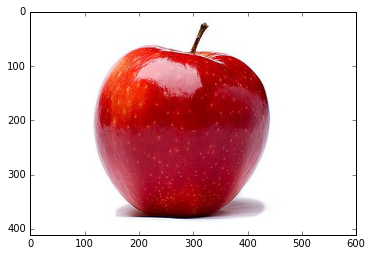

manzana2.jpg


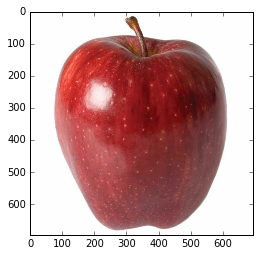

banano1.jpg


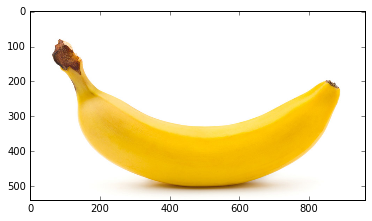

manzana3.jpg


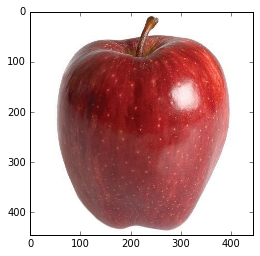

In [1]:
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os


di='/notebooks/imagenes/frutas'
# First, load the image again
dir_path = os.listdir(di)
print(dir_path)


for f in dir_path:
    print(f)  
    raw_image_data = mpimg.imread(di+'/'+f,"")
    image = tf.placeholder("float", [None, None, None])
    #slice(entrada,inicio,tamaño,name=None)
    r = tf.slice(image,[0,0,0],[-1,-1,1])
    g = tf.slice(image,[0,0,1],[-1,-1,1])
    b = tf.slice(image,[0,0,2],[-1,-1,1])


    #r = tf.scalar_mul(0.2126,r)
    #g = tf.scalar_mul(0.7152,g)
    #b = tf.scalar_mul(0.0722,b)
    grey = tf.add(r,tf.add(g,b))

    #concat(valores,eje,name='concat{})
    #out = tf.concat(2, [r,g,b])
    #out = tf.concat(2, [grey,grey, grey])
    
    out = tf.concat(2,[r,g,b])
    out = tf.cast(out, tf.uint8)

    with tf.Session() as session:
        result = session.run(out, feed_dict={image: raw_image_data})
        plt.imshow(result)
        plt.show()